# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [27]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [35]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [36]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


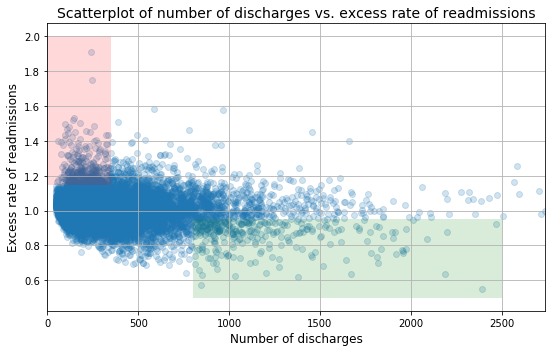

In [34]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

The report says that there's a downtrend in the rate of readmissions, but the graph does not indicate any noticable directional trend. The data is concentrated in a large, wide cluster spread centered around a readmission rate of 1, with no discernable directional movement either up or down. The findings say that for lower discharges, there's a greater rate of readmissions, but the data seems to only spread into the lower edge of the red box, and left edge of the green box. Most of the data is concentrated outside of the boxes. There doesn't seem to be any strong indication that lower discharges leads to higher rates of readmissions higher discharges to lower rates of readmissions. The correlation between the two variables seems incredibly weak. The conclusions in the report don't seem to be supported by the data.

In [37]:
print(clean_hospital_read_df.head())
print(clean_hospital_read_df.count() / len(clean_hospital_read_df))


                              Hospital Name  Provider Number State  \
16857           THREE RIVERS MEDICAL CENTER           180128    KY   
14582  SELLS INDIAN HEALTH SERVICE HOSPITAL            30074    AZ   
15606     PHS INDIAN HOSPITAL AT PINE RIDGE           430081    SD   
15615    FLORIDA STATE HOSPITAL UNIT 31 MED           100298    FL   
14551                GREENE COUNTY HOSPITAL            10051    AL   

                 Measure Name  Number of Discharges  Footnote  \
16857  READM-30-HIP-KNEE-HRRP                     0       7.0   
14582      READM-30-COPD-HRRP                     0       7.0   
15606       READM-30-AMI-HRRP                     0       7.0   
15615      READM-30-COPD-HRRP                     0       7.0   
14551       READM-30-AMI-HRRP                     0       7.0   

       Excess Readmission Ratio  Predicted Readmission Rate  \
16857                       NaN                         NaN   
14582                       NaN                         NaN   

There are missing values in the Readmission data columns that could be skewing  the results and should have been be dropped. Since the number of missing values is less than 1%, I conclude it's safe to exclude these rows from our analysis.

In [38]:
clean_hospital_read_df.dropna(
    subset=['Excess Readmission Ratio', 'Predicted Readmission Rate',
           'Expected Readmission Rate', 'Number of Readmissions'], inplace=True)

The report states:
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1

The plot however does not indicate that there is a downtrend in the rate of readmissions at hospitals with a larger number of discharges. The findings in the data are that the mean for hospitals with less than 100 discharges is 1.023 and hospitals with more than 1000 discharges is 0.978. While the higher discharge has a slightly lower readmission rate, this could be due to chance. There are also less data points for hospitals with $\ge1000$ discharges.

To test whether the rate of discharges has a statistically significant effect on the rate of readmissions, we should perform a hypothesis test assuming that the proportion of excess readmissions $(\ge 1)$ between high $(\ge 1000)$ discharge and low discharge hospitals are the same.

$H_0$ - $P_{high} = P_{low}$<br>
$H_1$ - $P_{high} \ne P_{low}$


In [43]:
# create subsets of high and low
data_high = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]
data_low = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] <= 1000]
n_high = len(data_high)
n_low = len(data_low)

# get the proportions
p_high = len(data_high[data_high['Excess Readmission Ratio'] > 1])/n_high
p_low = len(data_low[data_low['Excess Readmission Ratio'] > 1])/n_low

print(p_high, p_low)

0.4449244060475162 0.5195758564437194


In [91]:
from scipy import stats
# use a multiplier of 2.58 for a 99% confidence interval
z_star = 2.58

# we want a pooled sample proportion, p
p = (p_high * n_high + p_low * n_low) / (n_high + n_low)

# compute the standard error and margin of error
se = np.sqrt(p*(1-p)/n_high + p*(1-p)/n_low)
me = z_star * se

# confidence interval
ci = [(p_high - p_low) - me, (p_high - p_low) + me] 
# z-statistic
z = (p_high - p_low) / se
# two tailed p-value based on 1.96 CI
pval = z_star * stats.norm.cdf(z)

print(se, me)
print(z)
print(ci)
print(pval)

0.0237064586716 0.0611626633728
-3.14899207133
[-0.13581411376900637, -0.013488787023400013]
0.00211346685931


The margin of error with a $99\%$ confidence interval suggests that the proportions of excessive discharges between high discharge and low discharge hospitals should be within 0.0464 of each other 95% of the time. The $p$-value of $0.0021134$ indicates that the probability that we observed the difference in proportions between the two sets due to chance is about $0.2\%$. Given that, we would reject the null hypothesis at a $99\%$ confidence level. There appears to be a statistically significant difference in the excess readmission rates between lower discharge and higher discharge hospitals. 

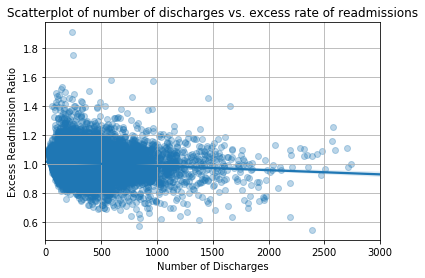

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


_ = sns.regplot(x='Number of Discharges', y='Excess Readmission Ratio', 
              data=clean_hospital_read_df, scatter_kws={'alpha':0.3})
_ = plt.xlim(0,3000)
_ = plt.grid(True)
_ = plt.title('Scatterplot of number of discharges vs. excess rate of readmissions')
plt.show()

The scatterplot does convey that there is a very slight trend downward trend in readmission rates as the discharge rate increases. However, because the data is so spread out, the correlation appears very weak. There's also no trendline. The limits on the $x$-axis restrict the plot to the main bulk of the data, but it hides the fact that there are extreme outliers which might be skeweing the result.